# AI Research Project - Nick Fabek

This project will perform classification targeting the quality column in the White Wine Quality Dataset. PyCaret will be used to test various models.


### Setup

In [30]:
# import PyCaret & Pandas
import pycaret
import pandas as pd
print("PyCaret Version: " + pycaret.__version__)
print("Pandas Version: " + pd.__version__)

PyCaret Version: 3.3.2
Pandas Version: 2.1.4


In [31]:
# loading White Wine Quality Dataset
data = pd.read_csv('winequality-white.csv', delimiter=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [32]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'quality', session_id = 123)

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4898, 12)"
5,Transformed data shape,"(4898, 12)"
6,Transformed train set shape,"(3428, 12)"
7,Transformed test set shape,"(1470, 12)"
8,Numeric features,11
9,Preprocess,True


### Compare Models

In [33]:
# compare baseline models
# metrics evaluated during CV can be accessed using get_metrics
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6666,0.3417,0.6666,0.6741,0.6527,0.4778,0.4855,0.0960
et,Extra Trees Classifier,0.6642,0.3423,0.6642,0.6718,0.6509,0.4743,0.4828,0.0720
lightgbm,Light Gradient Boosting Machine,0.6389,0.3302,0.6389,0.6365,0.6287,0.4447,0.4477,0.5150
gbc,Gradient Boosting Classifier,0.5741,0.0000,0.5741,0.5700,0.5568,0.3302,0.3379,0.5260
dt,Decision Tree Classifier,0.5694,0.2710,0.5694,0.5688,0.5682,0.3630,0.3633,0.0110
lda,Linear Discriminant Analysis,0.5236,0.0000,0.5236,0.5076,0.4988,0.2412,0.2513,0.0080
ridge,Ridge Classifier,0.5216,0.0000,0.5216,0.4512,0.4478,0.1941,0.2216,0.0080
lr,Logistic Regression,0.5143,0.0000,0.5143,0.4695,0.4672,0.2015,0.2176,0.3880
knn,K Neighbors Classifier,0.4696,0.2615,0.4696,0.4519,0.4535,0.1784,0.1803,0.2120
qda,Quadratic Discriminant Analysis,0.4688,0.0000,0.4688,0.4893,0.4571,0.2512,0.2622,0.0100


### Analyze Model

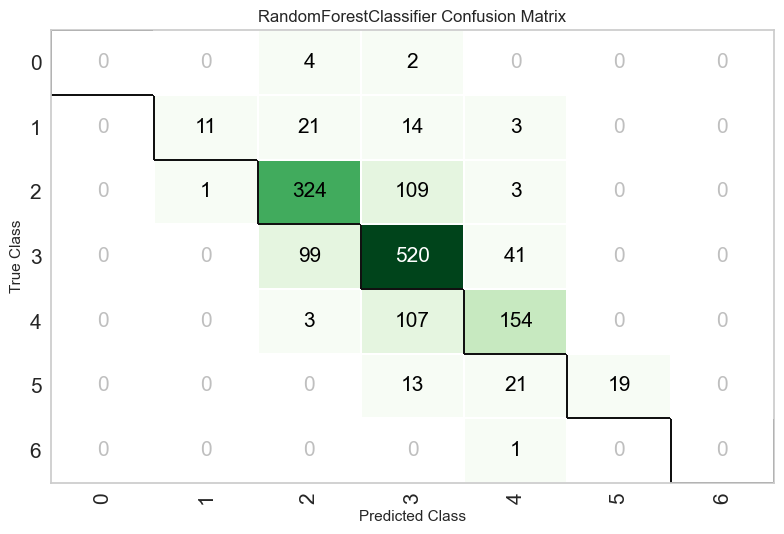

In [34]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

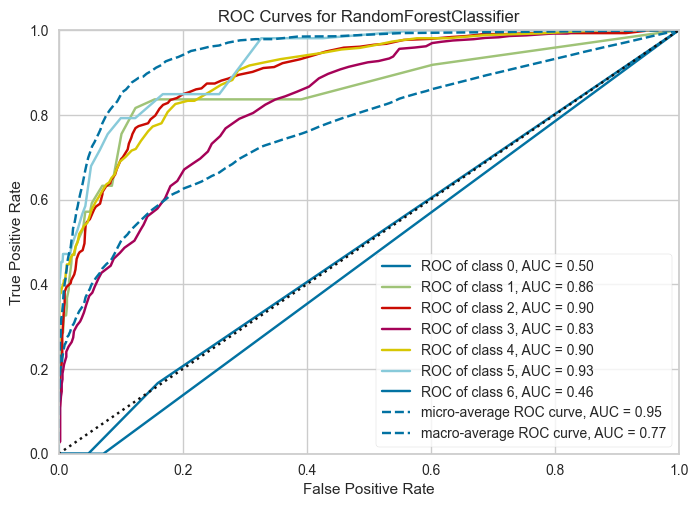

In [35]:
# plot AUC
plot_model(best, plot = 'auc')

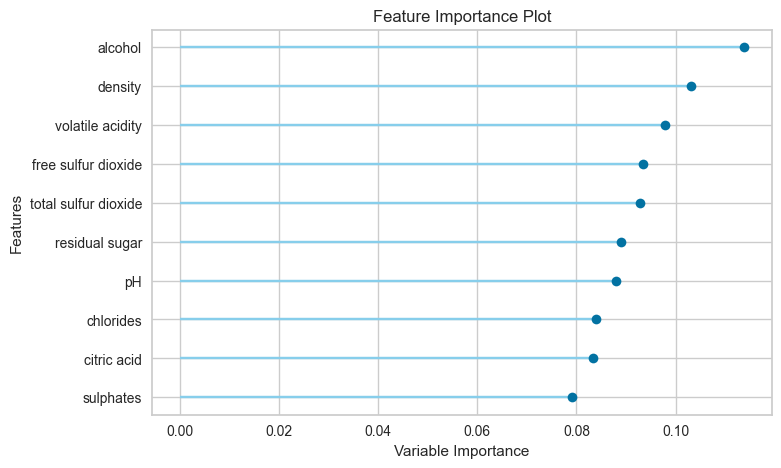

In [36]:
# plot feature importance
plot_model(best, plot = 'feature')

In [37]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Prediction

In [38]:
# predict on test set
# returns prediction_label and prediction_score (probability of the predicted class)
# when data is None (default) it uses the test set created during the setup function for scoring
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6993,0.8659,0.6993,0.7094,0.6892,0.5354,0.5390


In [39]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
139,8.1,0.28,0.39,1.9,0.029,18.0,79.0,0.99230,3.23,0.52,11.8,6,6,0.51
4620,6.4,0.38,0.19,4.5,0.038,36.0,119.0,0.99151,3.07,0.42,11.2,6,6,0.51
1689,7.1,0.16,0.25,1.3,0.034,28.0,123.0,0.99150,3.27,0.55,11.4,6,7,0.42
2724,7.5,0.18,0.31,6.5,0.029,53.0,160.0,0.99276,3.03,0.38,10.9,6,6,0.61
3812,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,5,5,0.77


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [40]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('quality', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [41]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,prediction_label,prediction_score
0,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0.74
1,6.3,0.30,0.34,1.600000,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0.95
2,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0.92
3,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95
4,7.2,0.23,0.32,8.500000,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0.95


### Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [42]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
               

In [43]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\njfab\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, n_estimators=100,
                                        n_jobs=-1, oob_score=False,
                                        random_state=123, verbose=0,
                                        warm_start=False))],
         verbose=False)